In [21]:
import astropy.io.fits as fits
import astropy.utils.data as datautils
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### 3. Galaxy colors and spectra

*Author: Jiarong Zhu*

Download the catalog of galaxies from the NASA Sloan Atlas between redshifts 0.01 < z < 0.05. Plot their absolute magnitude vs. color. Select several galaxies along the red and blue sequences, and download and show their color images. For the same galaxies, download from the SDSS database their spectra. Zoom in on the Hα region and the 4000 Aregion. Comment on the major differences between the blue and red galaxies.

In [22]:
nsa_file = datautils.download_file('http://sdss.physics.nyu.edu/mblanton/v0/nsa_v0_1_2.fits', cache=True)
hdul = fits.open(nsa_file)

In [23]:
z=hdul[1].data['Z']

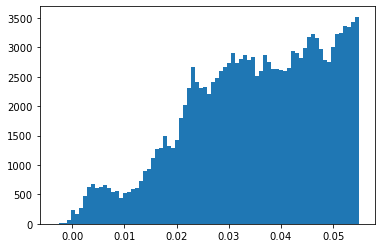

In [24]:
_ = plt.hist(z, bins='auto')  

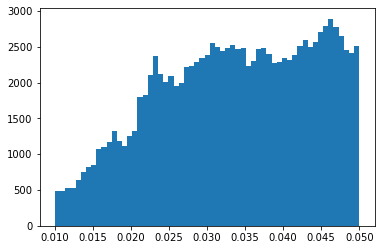

In [25]:
N = len(z)

#locate the data such that 0.01<z<0.05
index = np.where(abs(z-0.03)<0.02)  
data = hdul[1].data[index]

_ = plt.hist(data['Z'], bins='auto')  


In [26]:
mag = data['ABSMAG']  # absmag of FNugriz
x = mag[:,4]
y = mag[:,3]-mag[:,4]

(-24.0, -13.0)

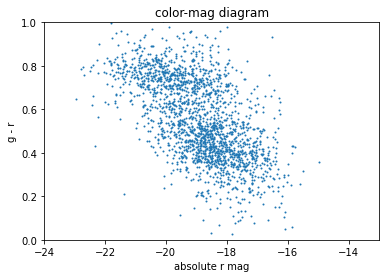

In [27]:
_ = plt.scatter(x[0:2000],y[0:2000],s=1) # I didn't use all data because I want to see the seperation of blue
# and red sequencies more clearly
plt.gca().invert_xaxis()
plt.ylabel('g - r')
plt.xlabel('absolute r mag')
plt.ylim(0,1)
plt.title('color-mag diagram')
plt.xlim(-24,-13)

In [28]:
i_red = []
i_blue = []

for i in range(len(y)):
    if abs(y[i]-0.3)<0.001: # find index of blue galaxies with g-r~0.03
        i_blue.append(i)
    elif abs(y[i]-0.8)<0.001: # find index of red galaxies with g-r~0.08
        i_red.append(i)
    
print(i_red[0:10])
print(i_blue[0:10])

[6, 27, 145, 190, 368, 966, 1320, 1915, 1940, 2186]
[71, 798, 887, 1159, 1717, 2855, 2928, 3521, 4132, 4928]


In [29]:
# randomly select 2 blue galaxies and 2 red galaxies, find their nsaid
indxs = np.array([27, 1320, 887, 3521])
print(data['NSAID'][indxs])

[  46 1675 1106 5022]


In [47]:
jpgurls = 'http://sdss.physics.nyu.edu/mblanton/v0/detect/v0_0/' + data['SUBDIR'][indxs] + '/' + data['IAUNAME'][indxs] + '.cutout.jpg'
jpgs = []
for jpgurl in jpgurls:
    jpgs.append(datautils.download_file(jpgurl))

[ 'http://sdss.physics.nyu.edu/mblanton/v0/detect/v0_0/09h/p00/J094404.05+004300.4/J094404.05+004300.4.cutout.jpg'
 'http://sdss.physics.nyu.edu/mblanton/v0/detect/v0_0/12h/m00/J125618.46-010155.9/J125618.46-010155.9.cutout.jpg'
 'http://sdss.physics.nyu.edu/mblanton/v0/detect/v0_0/11h/p00/J112858.10+005244.4/J112858.10+005244.4.cutout.jpg'
 'http://sdss.physics.nyu.edu/mblanton/v0/detect/v0_0/22h/m00/J220925.60-000633.1/J220925.60-000633.1.cutout.jpg']


In [48]:
specurls = []
specs = []
specurl_template =  'https://dr16.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/{plate:04d}/spec-{plate:04d}-{mjd}-{fiberid:04d}.fits'
for indx in indxs:
    specurls.append(specurl_template.format(plate=data['PLATE'][indx], mjd=data['MJD'][indx], fiberid=data['FIBERID'][indx]))
for specurl in specurls:
    specs.append(datautils.download_file(specurl))

The first two are red galaxies. In both cases, the spectra look similar to red giant spectra. There is a distinct "break" in the spectrum at 4000 Angstroms. Near H$\alpha$, in the first case there is a weak absorption line, and in the second there is a weak emission line. For an old population, we expect a weak absorption line from the stellar population; emission will be from ionized gas associated with either a small amount of star formation or with weak LINER or AGN activity. For weak lines like this, to disentangle how much emission vs. absorption there is requires detailed modeling (using other regions of the spectrum and stellar population modeling to predict the H$\alpha$ absorption).

In [87]:
i = 0
spec = specs[i]
jpg = jpgs[i]

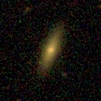

In [88]:
Image(filename=jpg, format='jpg')

Text(0, 0.5, 'Flux')

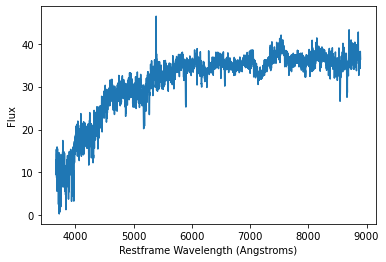

In [89]:
ds = fits.open(spec)
wave = 10**ds[1].data['loglam'] / (1. + data['Z'][indxs[i]])
flux = ds[1].data['flux']
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')

Text(0.5, 1.0, 'Spectrum near 4000 A')

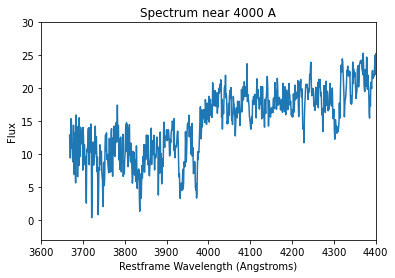

In [90]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([3600., 4400.])
plt.ylim([-3., 30.])
plt.title('Spectrum near 4000 A')

Text(0.5, 1.0, 'Spectrum near Halpha 6563 A')

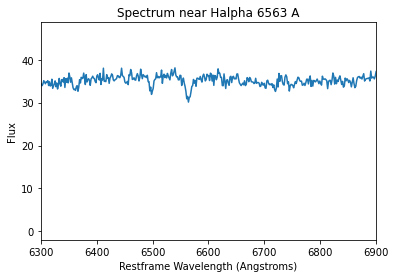

In [91]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([6300., 6900.])
plt.title('Spectrum near Halpha 6563 A')

In [92]:
i = 1
spec = specs[i]
jpg = jpgs[i]

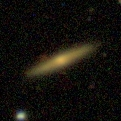

In [93]:
Image(filename=jpg, format='jpg')

Text(0, 0.5, 'Flux')

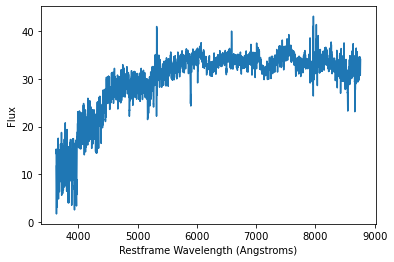

In [94]:
ds = fits.open(spec)
wave = 10**ds[1].data['loglam'] / (1. + data['Z'][indxs[i]])
flux = ds[1].data['flux']
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')

Text(0.5, 1.0, 'Spectrum near 4000 A')

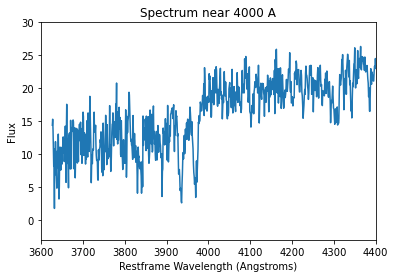

In [95]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([3600., 4400.])
plt.ylim([-3., 30.])
plt.title('Spectrum near 4000 A')

Text(0.5, 1.0, 'Spectrum near Halpha 6563 A')

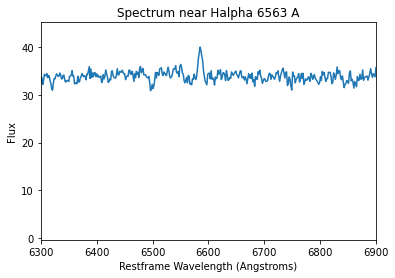

In [96]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([6300., 6900.])
plt.title('Spectrum near Halpha 6563 A')

The second two are blue galaxies. The 4000 A breaks are clearly weaker. The Balmer absorption lines visible in that region (especially for the second one) are clear, and the slope of the spectrum is blue, clearly indicating a young stellar population. Around H$\alpha$, there is very strong emission associated with the star formation. Note that there will *also* be fairly deep H$\alpha$ absorption in these galaxies, and accounting for this absorption is important for accurate measurements of the emission lines, but it is overwhelmed by the emission and so not apparent on casual inspection. 

In [110]:
i = 2
spec = specs[i]
jpg = jpgs[i]

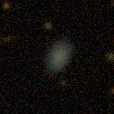

In [111]:
Image(filename=jpg, format='jpg')

Text(0, 0.5, 'Flux')

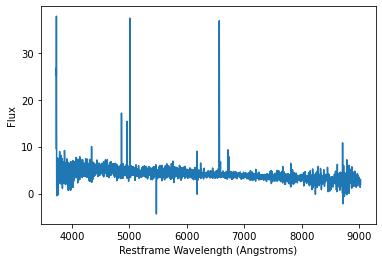

In [112]:
ds = fits.open(spec)
wave = 10**ds[1].data['loglam'] / (1. + data['Z'][indxs[i]])
flux = ds[1].data['flux']
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')

Text(0.5, 1.0, 'Spectrum near 4000 A')

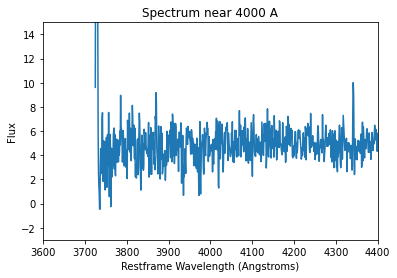

In [114]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([3600., 4400.])
plt.ylim([-3., 15.])
plt.title('Spectrum near 4000 A')

Text(0.5, 1.0, 'Spectrum near Halpha 6563 A')

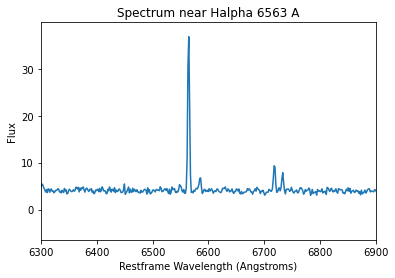

In [115]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([6300., 6900.])
plt.title('Spectrum near Halpha 6563 A')

In [116]:
i = 3
spec = specs[i]
jpg = jpgs[i]

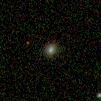

In [117]:
Image(filename=jpg, format='jpg')

Text(0, 0.5, 'Flux')

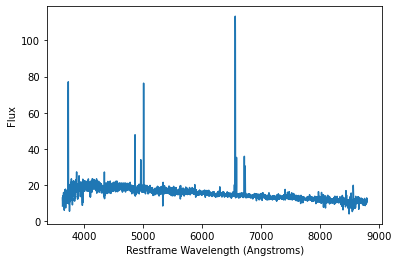

In [118]:
ds = fits.open(spec)
wave = 10**ds[1].data['loglam'] / (1. + data['Z'][indxs[i]])
flux = ds[1].data['flux']
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')

Text(0.5, 1.0, 'Spectrum near 4000 A')

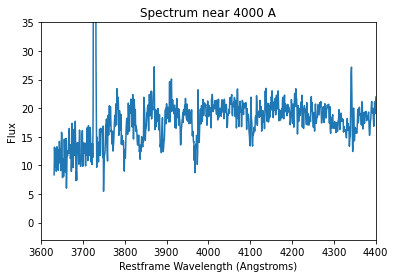

In [119]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([3600., 4400.])
plt.ylim([-3., 35.])
plt.title('Spectrum near 4000 A')

Text(0.5, 1.0, 'Spectrum near Halpha 6563 A')

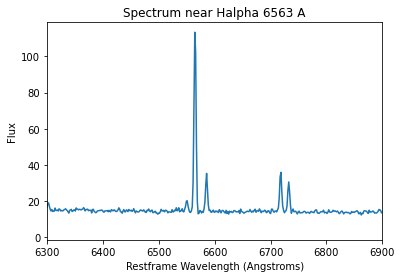

In [120]:
plt.plot(wave, flux)
plt.xlabel('Restframe Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim([6300., 6900.])
plt.title('Spectrum near Halpha 6563 A')

Generaly speaking, the spectrum reflects the color. Blue galaxies look blue while red galaxies look red, meaning the stellar populations have different temperatures.

Blue galaxies have strong emission in the Balmer series, such as H$\alpha$ emission, and significant emission in collisionally excited species such as OII, OIII, while red galaxies don't have that signature. Keyword: emission.

Red galaxies have a clear drop off in intensity blueward of 4000 A, which indicates composition of old stellar population and lack of hot blue stars. Blue galaxies don't have that. Keyword: absorption.